### Author: Mohsen Ghazel (mghazel)
* Date: March 31st, 2021

# **Project: Image Features Matching & Object Recognition**

The objective of this project is to demonstrate how to match features and recognize objects in a scene using OpenCV with Python API

* We shall implement various types of features matching algorithms.


In [ ]:
print(__doc__)

Automatically created module for IPython interactive environment


##**Step 1: Python imports**



In [1]:
# system environment
import sys
# I/O
import os
# OpenCV
import cv2
# Numpy
import numpy as np
# matplotlib
import matplotlib.pyplot as plt
# image processing library
import matplotlib.image as mpimg
# date and time
import datetime

# import warnings
import warnings
# suppress warnings
warnings.filterwarnings("ignore")

# check for successful package imports and versions
# python
print("Python version : {0} ".format(sys.version))
# OpenCV
print("OpenCV version : {0} ".format(cv2.__version__))
# numpy
print("Numpy version  : {0}".format(np.__version__))

Python version : 3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0] 
OpenCV version : 4.1.2 
Numpy version  : 1.19.5


##**Step 2: Read and visualize the input images**

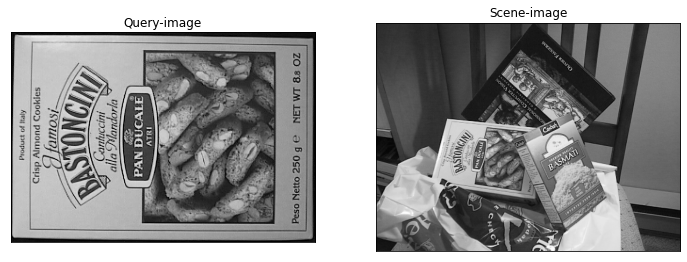

In [2]:
#-----------------------------------------------------------------------
# 2.1) Read the query-image
#-----------------------------------------------------------------------
# The input query image file name
query_img_file_path_name = os.path.join("sample_data","box.png")
# read the input query-image
img_query = cv2.imread(query_img_file_path_name)

# check if the query-image is read successfully
if img_query is None:
    sys.exit("Could not read the image file: " + query_img_file_path_name)

# check if it is grayscale image, if so convert it to RGB by 
# duplicating the channel
if (len(img_query.shape) == 2):
  mg_query = np.uint8(cv2.merge([mg_query,mg_query,mg_query]))

# check if it is color image, if so convert it to grayscale
if (len(img_query.shape) > 2):
    gray_query = cv2.cvtColor(img_query, cv2.COLOR_BGR2GRAY)
else: # make a copy of the query-image
    gray_query = img_query.copy()

#-----------------------------------------------------------------------
# 2.2) Read the scene image
#-----------------------------------------------------------------------
# The input scene image file name
scene_img_file_path_name = os.path.join("sample_data","box-in-scene.png")
# read the input scene-image
img_scene = cv2.imread(scene_img_file_path_name)

# check if the scene-image is read successfully
if img_scene is None:
    sys.exit("Could not read the image file: " + scene_img_file_path_name)

# check if it is grayscale image, if so convert it to RGB by 
# duplicating the channel
if (len(img_scene.shape) == 2):
  mg_scene = np.uint8(cv2.merge([mg_scene,mg_scene,mg_scene]))

# check if it is color image, if so convert it to grayscale
if (len(img_scene.shape) > 2):
    gray_scene = cv2.cvtColor(img_scene, cv2.COLOR_BGR2GRAY)
else: # make a copy of the scene-image
    gray_scene = img_scene.copy()

#-----------------------------------------------------------------------
# 2.3) Display the scene and the query images:
#-----------------------------------------------------------------------
# create a figure
plt.figure("Input scene and query images",figsize=(12,10))
#-----------------------------------------------------------------------
# 2.3.1) display the input query-image 
#-----------------------------------------------------------------------
# display the original query-image
plt.subplot(121)
plt.title("Query-image", fontsize = 12)
plt.xticks([]), plt.yticks([])
# display the query-image
# - if the image is RGB
if (len(img_query.shape) > 2):
    plt.imshow(img_query);
else: # for grayscale image
    plt.imshow(img_query, cmap='gray');
#-----------------------------------------------------------------------
# 2.3.2) display the input scene-image 
#-----------------------------------------------------------------------
# create a figure
plt.figure("Input scene and query images",figsize=(12,10))
# display the original scene-image
plt.subplot(122)
plt.title("Scene-image", fontsize = 12)
plt.xticks([]), plt.yticks([])
# display the scene image
# - if the image is RGB
if (len(img_scene.shape) > 2):
    plt.imshow(img_scene);
else: # for grayscale image
    plt.imshow(img_scene, cmap='gray');

##**Step 3: Brute-Force Feature Matching**

* Brute-Force matcher is simple:
  * It takes the descriptor of each query-image feature in first and matches it with all other features in scene-image using some distance calculation. 
    * The closest one is returned.
  * This process is repeated for all the features
  * In the end we pick the K features, based on the distances separating the query feature and its matched reference-image feature.

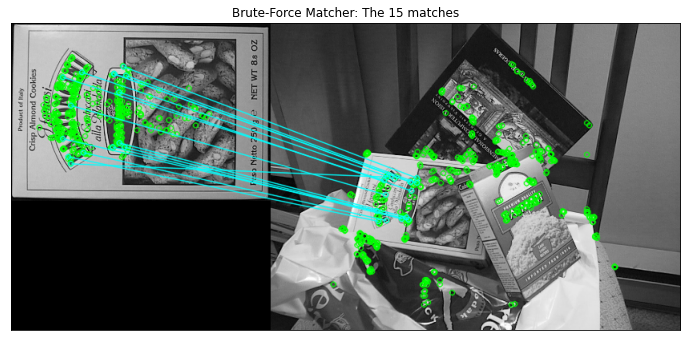

In [3]:
#=================================================================
# 3) Brute-Force Feature Matcher
#=================================================================
# Step 1: Detect the features from the scene and query 
#         images:
#-----------------------------------------------------------------
#         - We compute the ORB features
#         - One may experiment with computing other features
#           such as Harris corners, FAST, BRIEF, etc.
#-----------------------------------------------------------------
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
# - for the query image
kp_query, des_query = orb.detectAndCompute(gray_query,None)
# - for the scene image
kp_scene, des_scene = orb.detectAndCompute(gray_scene,None)

#-----------------------------------------------------------------
# Step 2: Match the scene and query images features using the 
#         Brute-Force Matcher.
#-----------------------------------------------------------------
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des_query,des_scene)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

#-----------------------------------------------------------------
# Step 3: Visualize the matches
#-----------------------------------------------------------------
# visualization preferences parameters
draw_params = dict(matchColor = (0,255,255),  # matching-lines color
                   singlePointColor = (0,255,0), #  keypoints color
                   flags = cv2.DrawMatchesFlags_DEFAULT) # show kepoints and matching lines
# Draw first 15 matches.
img3 = cv2.drawMatches(img_query,kp_query,img_scene,kp_scene,matches[:15],None,**draw_params)
# create the figure
plt.figure("BFMatcher - Best Match",figsize=(12,16))
plt.subplot(111)
plt.title("Brute-Force Matcher: The 15 matches", fontsize = 12)
plt.xticks([]), plt.yticks([])
plt.imshow(img3);

##**Step 4: FLANN Based Feature Matching**

* FLANN stands for Fast Library for Approximate Nearest Neighbors:
  * It contains a collection of algorithms optimized for fast nearest neighbor search in large datasets and for high dimensional features. 
  * It works faster than BFMatcher for large datasets. 

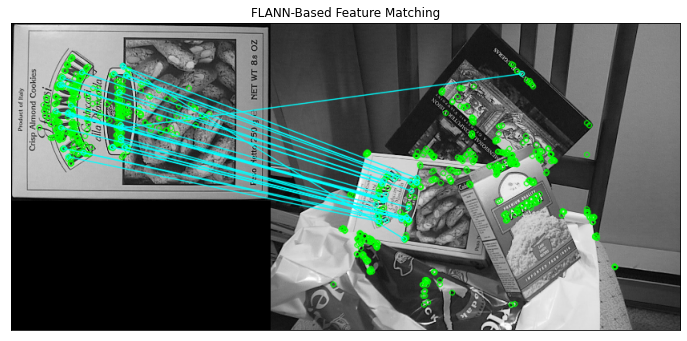

In [4]:
#=================================================================
# 4) FLANN-Based Feature Matcher
#=================================================================
# 4.1) Detect the features from the scene and query 
#      images:
#-----------------------------------------------------------------
#         - We compute the ORB features
#         - One may experiment with computing other features
#           such as Harris corners, FAST, BRIEF, etc.
#-----------------------------------------------------------------
# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints and descriptors with ORB
# - for the query image
kp_query, des_query = orb.detectAndCompute(gray_query,None)
# - for the scene image
kp_scene, des_scene = orb.detectAndCompute(gray_scene,None)

#-----------------------------------------------------------------
# 4.2) Apply FLANN matcher
#-----------------------------------------------------------------
# When using ORB features, you can pass the following. 
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
               table_number = 6, # 12
               key_size = 12,     # 20
               multi_probe_level = 1) #2
# search params
search_params = dict(checks=50)   # or pass empty dictionary
# create the FLANN matcher
flann = cv2.FlannBasedMatcher(index_params, search_params)
#  We apply the knnMatch() to get k best matches. 
# - In this example, we will take k=2 so that we can apply ratio test
matches = flann.knnMatch(des_query, des_scene, k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.75*n.distance:
        matchesMask[i]=[1,0]

#-----------------------------------------------------------------
# 4.3) Visualize the matches
#-----------------------------------------------------------------  
# visualization preferences parameters       
draw_params = dict(matchColor = (0,255,255),  # matching-lines color
                   singlePointColor = (0,255,0), #  keypoints color
                   matchesMask = matchesMask,
                   flags = cv2.DrawMatchesFlags_DEFAULT) # show kepoints and matching lines
# overlay the matches on the images
img3 = cv2.drawMatchesKnn(img_query,kp_query,img_scene,kp_scene,matches,None,**draw_params)

# create the figure
plt.figure("FLANN-Based Feature Matching",figsize=(12,16))
plt.subplot(111)
plt.title("FLANN-Based Feature Matching", fontsize = 12)
plt.xticks([]), plt.yticks([])
plt.imshow(img3);

##**Step 5: Query Image Recognition**
* The matched features are used to estimate the Homography matrix:
  * The Homography matrix H is a 3x3 matrix, which provides a linear transformation between query and scene images
  * It transforms the query-image plane P1 to the scene-image plane P2.
* Once the Homography matrix H is estimated:
  * We can then localize the query image in the scene image by mapping its four corners/vertices using the Homography matrix H.





The estimated Homography matrix: H = [[ 4.43847781e-01 -1.17603871e-01  1.17431301e+02]
 [-4.31125831e-03  4.81667451e-01  1.59213335e+02]
 [-3.03207257e-04 -6.99782680e-05  1.00000000e+00]]


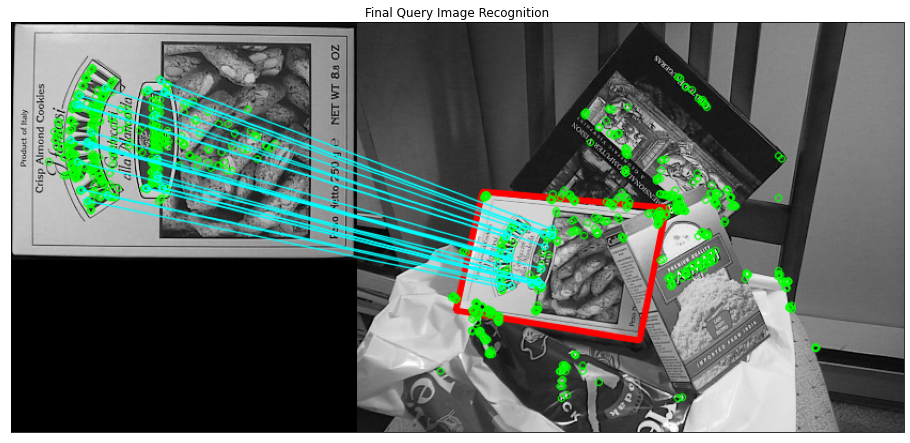

In [7]:
#-----------------------------------------------------------------  
# Step 5: Query Image Recognition: FLANN-Based Feature Matching
#-----------------------------------------------------------------  
# 5.1) Store all the good matches satisfying the ratio test.
#-----------------------------------------------------------------  
good = []
# filter all the matches:
#  - only keep the good matches based on Ratio Test
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)
#-----------------------------------------------------------------
# 5.2) Compute the Homography matrix and map the query image to 
#      the scene image
#-----------------------------------------------------------------
# - This can only be done if we have a sufficient number of matches:
# - The minimum number of good matches required 
#-----------------------------------------------------------------
MIN_MATCH_COUNT = 10
# if we have sufficient number of good matches
if len(good)>MIN_MATCH_COUNT:
    # the query image matches
    src_pts = np.float32([ kp_query[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    # the scene image matches
    dst_pts = np.float32([ kp_scene[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    # compute the homography by solving a system of equations
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    # display the homography matrix
    print("The estimated Homography matrix: H = " + str(M))
    # process the mask to convert it list
    matchesMask = mask.ravel().tolist()
    # the shape of the query image
    h,w,d = img_query.shape
    # get the four corner so fthe query images
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    # map the four corners o fthe queery image using the estimated homography
    dst = cv2.perspectiveTransform(pts,M)
    # overlay the boundaries of the detected query image on the scene image
    img2 = cv2.polylines(img_scene,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else: # in case there is not enough good matches
    print("Not enough matches are found - {0}/{1}".format(len(good),MIN_MATCH_COUNT))
    matchesMask = None
    
#-----------------------------------------------------------------
# 5.3) Visualize the matches
#-----------------------------------------------------------------
# visualization preferences parameters
draw_params = dict(matchColor = (0,255,255),  # matching-lines color
                   singlePointColor = (0,255,0), #  keypoints color
                   matchesMask = matchesMask, # draw only inliers
                   flags = cv2.DrawMatchesFlags_DEFAULT) # show kepoints and matching lines

#-----------------------------------------------------------------
# 5.4) Overlay the final results on the query and scene images:
#-----------------------------------------------------------------
# - detected features for the query and scene images
# - The mactched features between the 2 images
# - The detected location of the query image in the scene image
#-----------------------------------------------------------------
img3 = cv2.drawMatches(img_query,kp_query,img_scene,kp_scene,good,None,**draw_params)
plt.figure("Final Query Image Recognition",figsize=(16,12))
plt.subplot(111)
plt.title("Final Query Image Recognition")
plt.xticks([]), plt.yticks([])
plt.imshow(img3);

##**Step 6: End of Execution**
* Display a successful end of execution message

In [8]:
# display a final message
# current time
now = datetime.datetime.now()
# display a message
print('Program executed successfully on: '+ str(now.strftime("%Y-%m-%d %H:%M:%S") + "...Goodbye!\n"))

Program executed successfully on: 2021-04-01 00:51:48...Goodbye!

